## Project: Fisher Iris Data

## Author: Regina Fennessy

----------

### Introduction

This project is going to explore classification algorithms on the Iris flower dataset. It will explain what Supervised learming is and what classification algorithms are.<br> Multiple classifications will be implemented and discussed on this dataset.

In [30]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import requests
from PIL import Image
from IPython.display import display
import io
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score






## Iris Flower data set Background

The Iris flower data set was made famous by Ronald Fisher in 1936. 

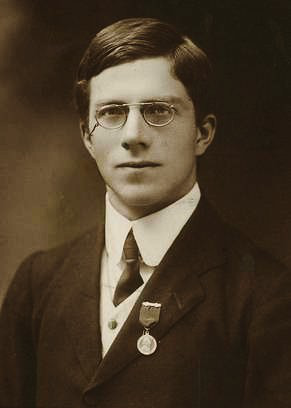

In [6]:
# Url
url = "https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG"
response = requests.get(url)

image_data = response.content
image = Image.open(io.BytesIO(image_data))
# Show image
display(image)


It is also know as the Anderson's Iris data set  as Edgar Anderson collected the data to quantify variation on the 3 types of flowers. <br>
This dataset is one of the most used datasets especially as a beginner's dataset for machine learning. <br>
The dataset is made up of 50 samples from 3 different types of the Iris flower species.<br>
It contains five attributes:<br>
Species <br>
Sepal length <br>
Sepal Width <br>
Petal Length <br>
Petal Width <br>

## Supervised Learning

Supervised learning is a subcategory of machine learning. It is also know as supervised machine learning. It is used to train algorithms to classify a dataset. It is used to help solve real world problems. By training this dataset it allows the model to learn over time and make predictions on unseen data. <br>


### Classification Algorithms

Are a subset of machine learning algorithms and these are used to categorise items into classes.<br>
With these new categorised dataset and using algorithms it allows you to classify future datasets into revelant categories.<br>
There are 4 types of classification Algorithms in machine learning.<br>
1. K-Nearest Neighbors: This is used to determine how to classify your data to its nearest neighbor.<br>
2. Logistic Regression: Is a supervised learning classification technique that forecasts the likelihood of a target variable.<br>
3. Support Vector Machine: Is a supervised learning mode used for classification tasks. Its can be used for both linear and non linear data classification.<br>

### 1. K-Nearest Neighbour

K-Nearest Neighbour or KNN is a machine learning algorithim used for classification and regression. 
Its method is to find a set number of training samples nearest to the new point. <br>The number of samples can be defined by the user. 
The k-nearest neighbour makes predictions based on similar new datapoint.

#### Key concepts
1. Distance Metric - The similarity between two data points is measured using a distance metric. Example of this is the Euclidean Distance.

$$\sqrt{\sum_{i=1}^n (x_i-y_i)^2} $$ 

2. k-NN Algorithm - using a new data point x it calculates the difference between x and the data points in the training set. It assigns the most frequent class in k-nearest neighbors to x.

##### Implementation of k-NN

In [7]:
data = datasets.load_iris()
print(data['data'][:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [8]:
# Flower names
list(data.target_names)

['setosa', 'versicolor', 'virginica']

Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



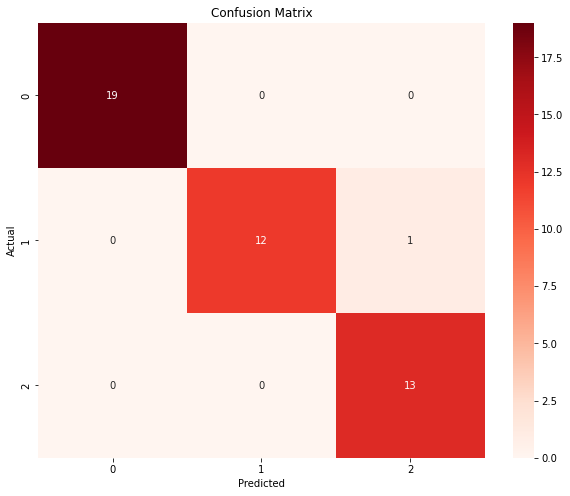

In [9]:
# Variables 
X = data.data
Y = data.target

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the k-NN classifier with k=
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, Y_train)

# Predictions
Y_pred = knn_classifier.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(Y_pred, Y_test,))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)

# Size of chart 
plt.figure(figsize=(10, 8))

# Plot the results on a confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")

# X axis label
plt.xlabel("Predicted")

# y axis label
plt.ylabel("Actual")

# Show title
plt.title("Confusion Matrix")

# Plot
plt.show()

##### Conclusion for k-Nearest Neighbor
This classifer used on the Iris data set demonstrates a high accuracy score of 100% when using the kNN = 5 and is consistance accross all classes. If I change it to kNN = 1, accuracy is still high at 97%. It sucessfully distinguishes between the 3 classess of flowers in the dataset. On understanding of the key concepts such as distance metrics and the choice of 
kNN, you can effectively apply and interpret k-NN for various machine learning tasks.

### 2. Logistic Regression

Logistic Regression is a statistical model used for classification and predictive analytics. It is used where there are one or more independent variables to reach an outcome.<br>


$$\P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}} $$

##### Implementation of logistic Regression

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



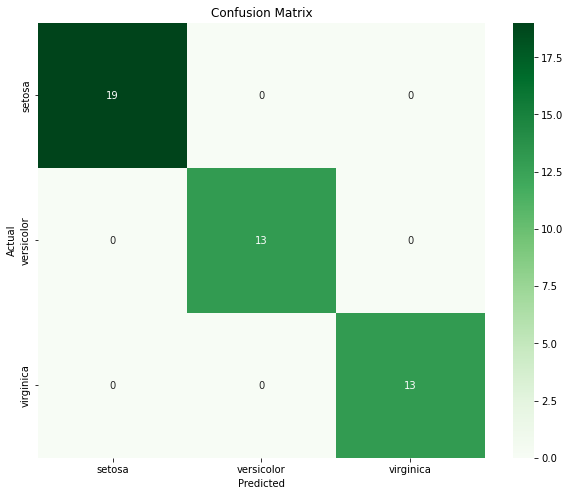

In [36]:


# Initialize and train the Logistic Regression model
model = LogisticRegression(penalty='l2', C=1.0, max_iter=10000, random_state=42)
model.fit(X_train, Y_train)

# Predictions
Y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Show results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Plot using a confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

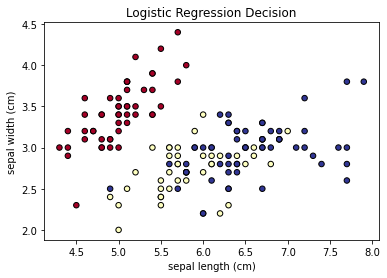

In [11]:
# Testing the first two features
X = data.data[:, :2]  
Y = data.target

# Plot the data points on a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu, edgecolor='k', s=30
            
            )

# X axis is sepal lenght
plt.xlabel(data.feature_names[0])

# y axis is sepal width
plt.ylabel(data.feature_names[1])

# Show Title
plt.title('Logistic Regression Decision')

# Plot
plt.show()

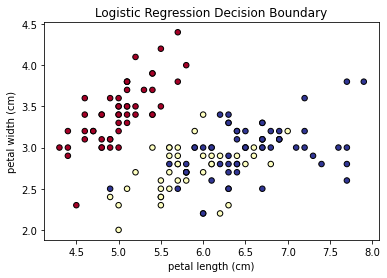

In [12]:
# Plot the data points on a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu, edgecolor='k', s=30)

# X axis is petal lenght
plt.xlabel(data.feature_names[2])

# y axis is petal width
plt.ylabel(data.feature_names[3])

# Show Title
plt.title('Logistic Regression Decision Boundary')

# Plot
plt.show()

##### Conclusion for Logistic Regression
This classifer used on the Iris data set demonstrates a high accuracy score of 100% and is consistance accross all classes. It sucessfully distinguishes between the 3 classess of flowers in the dataset. The confusion matrix show where the model is making errors, providing insights into potential areas for improvement.
The classification report gives a comprehensive view of the model's performance across different metrics for each class.

### 3. Support Vector Machine

Support Vector Machine is a supervised learning mode used for classification tasks. Its can be used for both linear and non linear data classification.

Decision Function:
$$\
f(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

Classification:
$$\
\hat{y} = 
\begin{cases} 
1, & \text{if } f(x) \geq 0 \\
-1, & \text{otherwise}
\end{cases}
$$


##### Advantages

1. Effective in high dimensional spaces.<br>
2. Versatile allowing it to handle non linear data.<br>
3. Memory efficient as it uses a subset of training points.<br>

##### Disadvantages

1. Does not directly provide probability estimates.<br>
2. Avoid over fitting is the no of features is greater than the no of samples.<br>


Accuracy: 95.45 %
Standard Deviation: 7.33 %
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



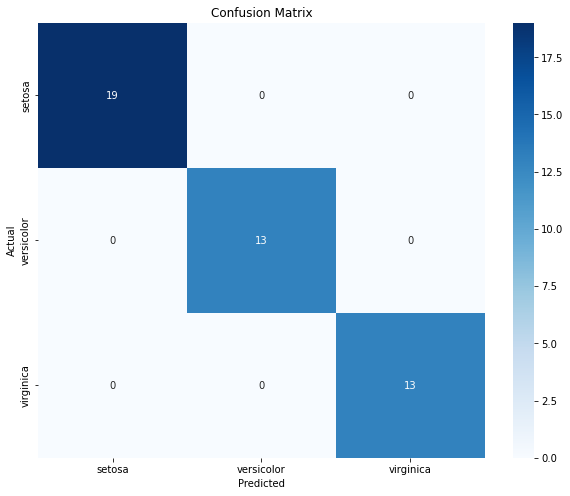

In [38]:

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=0)

# Train the SVM model
svm_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = cross_val_score(estimator = svm_model, X = X_train, y = Y_train, cv = 10)

# Print accuracies
print("Accuracy: {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy.std()*100))

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate and display the classification report
classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



##### Conclusion for SVM
The Support Vector Machine model demonstrates a high performance and high accruacy coming in at 95%. <br>
This is a reliable choice of classification algorythim for the Iris Dataset. It sucessfully distinguishes between the 3 classess of flowers in the dataset.

-------------------------

## Reference

- Dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set <br>
- Supervised learning: https://www.ibm.com/topics/supervised-learning<br>
- k-nearest neighbour: https://scikit-learn.org/stable/modules/neighbors.html<br>
- Logistic Regression: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#logistic-regression-3-class-classifier<br>
- Support Vector Machines: https://scikit-learn.org/stable/modules/svm.html<br>
- Support Vector Machines:https://www.researchgate.net/publication/338977019_A_new_model_for_iris_data_set_classification_based_on_linear_support_vector_machine_parameter's_optimization<br>
- k-nearest neighbour: https://www.researchgate.net/profile/Tumma-Srinivasarao/publication/359064863_Iris_Flower_Classification_Using_Machine_Learning/links/622632fb3c53d31ba4af19e1/Iris-Flower-Classification-Using-Machine-Learning.pdf<br>